**INTRO**

Let's consider an example of a Moving Average (MA) time series model. In this example, we'll create a simple time series dataset and fit an MA(2) model to it. The model equation would look like this:
Xt =εt−θ1(εt−1)−θ2(εt−2)

Here, Xt is the observed value at time t, and εt is the white noise error term at time t. 
θ1 and θ2 are the coefficients associated with the lagged error terms.

Let's generate a time series dataset and fit an MA(2) model using Python libraries:

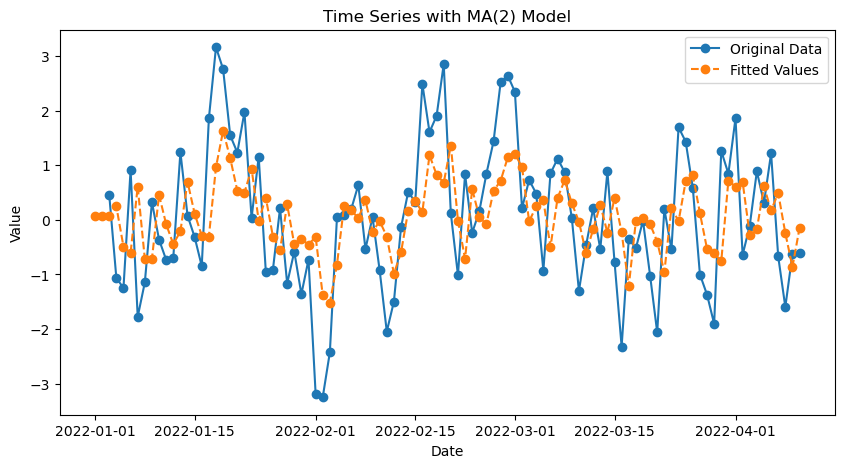

                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                  100
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -150.711
Date:                Sun, 21 Jan 2024   AIC                            309.421
Time:                        19:54:18   BIC                            319.842
Sample:                             0   HQIC                           313.639
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0623      0.196      0.319      0.750      -0.321       0.446
ma.L1          0.4787      0.098      4.873      0.000       0.286       0.671
ma.L2          0.2390      0.109      2.198      0.0

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Generate a time series with a simple pattern
np.random.seed(123)
t = np.arange(1, 101)
epsilon = np.random.normal(size=100)
X = epsilon + 0.5 * pd.Series(epsilon).shift(1) + 0.3 * pd.Series(epsilon).shift(2)

# Create a DataFrame
df = pd.DataFrame({'Date': pd.date_range(start='2022-01-01', periods=100, freq='D'), 'Value': X})

# Plot the original time series
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Value'], label='Original Data', marker='o')

# Fit an MA(2) model using ARIMA
ma_order = (0, 0, 2)  # p=0 (no autoregressive terms), d=0 (no differencing), q=2 (MA(2))
arima_model = sm.tsa.ARIMA(df['Value'], order=ma_order)
results = arima_model.fit()

# Plot the fitted values
plt.plot(df['Date'], results.fittedvalues, label='Fitted Values', linestyle='--', marker='o')

# Add labels and legend
plt.title('Time Series with MA(2) Model')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

# Show the plot
plt.show()

# Display model summary
print(results.summary())

The blue line in the graph represents the original time series data. Each point on the blue line corresponds to an actual observation in your dataset. 

Each data point on the blue line represents an observed value at a specific time point in your time series.
For example, if you are analyzing daily stock prices, each point on the blue line corresponds to the closing price on a particular day.

The shape and direction of the blue line reveal temporal patterns in your data. You might observe trends, cycles, or seasonality over time.
Trends could be upward, downward, or relatively flat, indicating changes in the variable you are measuring.

Peaks and valleys in the blue line represent high and low points in your time series. These can be indicative of cycles or recurring patterns.
The variability of the blue line indicates the degree of volatility or stability in your time series. Wide fluctuations suggest high volatility, while a stable line suggests relatively steady values.

Any points that deviate significantly from the general pattern might represent outliers or anomalies in your data. These could be caused by unusual events or errors in measurement.

The blue line provides a visual overview of the characteristics of your time series, helping you understand the nature of the variable you are studying.

The blue line serves as the ground truth, representing the actual behavior of the phenomenon you are modeling. It is the basis against which you compare the predictions of your model.

In summary, the blue line is a visual representation of your actual time series data. Analyzing this line individually helps you understand the intrinsic patterns, trends, and characteristics of the variable you are studying. When assessing the model's fit, the goal is to see how closely the fitted values (orange dashed line) align with and capture the information conveyed by the blue line.

**Original Data (Blue Line with Circular Markers):**
These are the actual values you observed or collected for your time series. It's your real-world data.

**Fitted Values (Orange Dashed Line with Circular Markers):** These are the values predicted by the MA(2) model. The model tries to mimic the patterns in your actual data using its estimated parameters.

The goal is to have the orange dashed line (fitted values) as close to the blue line (original data) as possible.
When they're close, it means your model is doing a good job at guessing what the actual values should be at each point in time.

In this example, we create a time series with a simple pattern involving the current error term (εt) and lagged error terms 
(εt-1, εt−2). The statsmodels library is used to fit an MA(2) model to the generated time series, and the fitted values are plotted along with the original data.

The results.summary() provides information about the estimated coefficients (θ1 and θ2) and other relevant statistics. Keep in mind that the example uses a generated dataset, and in practice, you would fit a model to real-world data.

**SO WHAT ABOUT THETA INTERPRETATION**

These coefficients play a crucial role in determining the impact of past error terms on the current observation. 

**θ1(Coefficient for εt−1):**
θ1 represents the weight or influence of the error term at time t−1 (εt−1) on the current observation Xt.
A positive θ1 indicates a positive relationship between the past error and the current observation. If the previous error was positive, it contributes positively to the current observation, and vice versa.
The magnitude of θ1 determines how much importance is given to the past error term.

**θ2(Coefficient for εt−2):**
θ2 represents the weight or influence of the error term at time t−2 (εt−2) on the current observation Xt.
Similar to θ1, a positive θ2 indicates a positive relationship between the error at t−2 and the current observation.
The magnitude of θ2 determines how much importance is given to the error term at a lag of 2.

**CONCLUSION** : In summary, θ1 and θ2 control how the past errors affect the current value of the time series. They are estimated during the model fitting process, and their values provide insights into the temporal dependencies present in the data. Analyzing the signs and magnitudes of these coefficients helps interpret the dynamics of the MA process and its impact on the observed time series.